In [47]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("YouTube Spam Dataset.csv")
df.head()

,AUTHOR,CONTENT,CLASS
0,lekanaVEVO1,i love this so much. AND also I Generate Free ...,1
1,Pyunghee,http://www.billboard.com/articles/columns/pop-...,1
2,Erica Ross,Hey guys! Please join me in my fight to help a...,1
3,Aviel Haimov,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,John Bello,Hey everyone. Watch this trailer!!!!!!!! http...,1


In [50]:
# # Remove The Column "COMMENT_ID" and "DATE" Because it is Not Useful for The Analysis
# df = df.drop(["COMMENT_ID", "DATE"], axis=1)
# df.head()

In [51]:
df.isnull().sum()

AUTHOR     0
CONTENT    0
CLASS      0
dtype: int64

In [52]:
# Remove The Null Values
df = df.dropna()

In [53]:
df.isnull().sum()

AUTHOR     0
CONTENT    0
CLASS      0
dtype: int64

In [54]:
# Check The Shape of The Dataset
df.shape

(1956, 3)

In [55]:
# Check The Value Counts of The "CLASS" Column
df["CLASS"].value_counts()

CLASS
1    1005
0     951
Name: count, dtype: int64

In [56]:
# Remove HTML Tags From The "CONTENT" Column
import re
def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
df["CONTENT"] = df["CONTENT"].apply(remove_html_tags)
df.head()

,AUTHOR,CONTENT,CLASS
0,lekanaVEVO1,i love this so much. AND also I Generate Free ...,1
1,Pyunghee,http://www.billboard.com/articles/columns/pop-...,1
2,Erica Ross,Hey guys! Please join me in my fight to help a...,1
3,Aviel Haimov,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,John Bello,Hey everyone. Watch this trailer!!!!!!!! http...,1


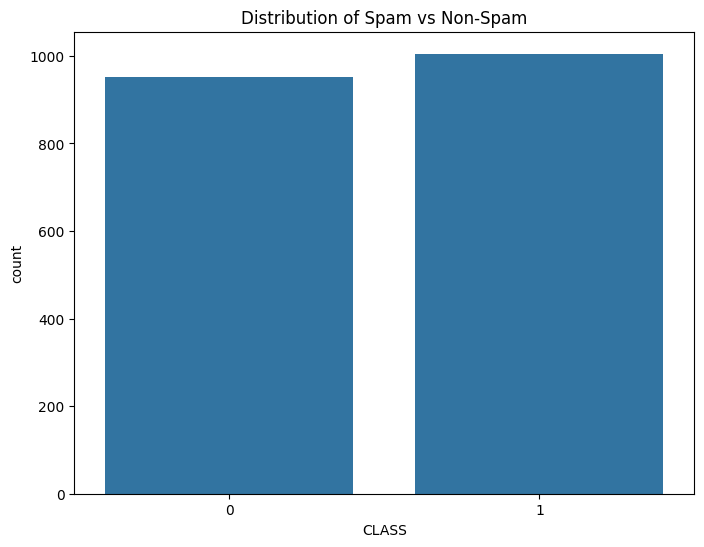

In [57]:
# Plot The Value Counts of The "CLASS" Column In a Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x="CLASS", data=df)
plt.title("Distribution of Spam vs Non-Spam")
plt.show()

In [58]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [73]:
df.head(20)

,AUTHOR,CONTENT,CLASS
0,lekanaVEVO1,i love this so much. AND also I Generate Free ...,1
1,Pyunghee,http://www.billboard.com/articles/columns/pop-...,1
2,Erica Ross,Hey guys! Please join me in my fight to help a...,1
3,Aviel Haimov,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,John Bello,Hey everyone. Watch this trailer!!!!!!!! http...,1
5,Nere Overstylish,check out my rapping hope you guys like it ht...,1
6,Jayki L,"Subscribe pleaaaase to my instagram account , ...",1
7,djh3mi,hey guys!! visit my channel pleaase (i'm searc...,1
8,Manuel Ortiz,Nice! http://www.barnesandnoble.com/s/BDP?csrf...,1
9,Mike Bennett,http://www.twitch.tv/daconnormc﻿,1


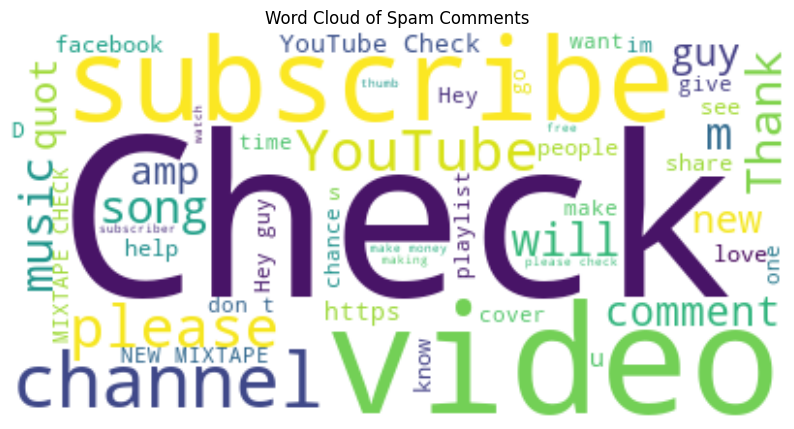

In [60]:
# Word Cloud of Spam Comments
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
spam_comments = df[df["CLASS"] == 1]["CONTENT"]
spam_wc = WordCloud(
    background_color="white",
    max_words=50,
    stopwords=stopwords
)
spam_wc.generate(" ".join(spam_comments))
plt.figure(figsize=(10, 8))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Spam Comments")
plt.show()

In [61]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X = np.array(df["CONTENT"])
Y = np.array(df["CLASS"])

cv = CountVectorizer()
X = cv.fit_transform(X)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, 
                                                test_size=0.2, 
                                                random_state=42)

In [63]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

# Bernoulli Naive Bayes

In [64]:
from sklearn.naive_bayes import BernoulliNB

BernoulliNB = BernoulliNB()
BernoulliNB.fit(xTrain, yTrain)

BernoulliNB()

In [65]:
yPred_BNB = BernoulliNB.predict(xTest)
print('Bernoulli Naive Bayes Accuracy Measures:')
print('F1 Score:', f1_score(yTest, yPred_BNB))
print('AUC-ROC:', roc_auc_score(yTest, yPred_BNB))
print('Accuracy:', accuracy_score(yTest, yPred_BNB))
print('Precision:', precision_score(yTest, yPred_BNB))
print('Recall:', recall_score(yTest, yPred_BNB))

Bernoulli Naive Bayes Accuracy Measures:
F1 Score: 0.8742857142857142
AUC-ROC: 0.8863228057385374
Accuracy: 0.8877551020408163
Precision: 0.9745222929936306
Recall: 0.7927461139896373


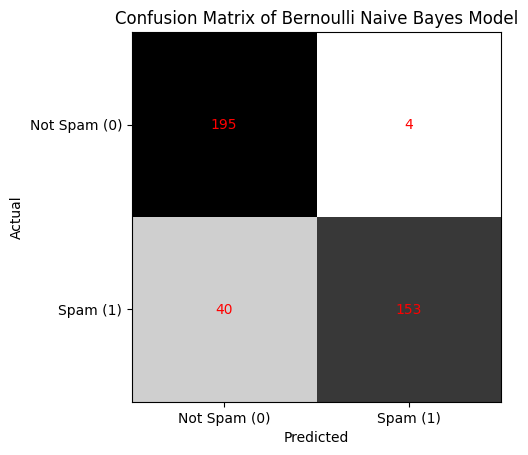

In [66]:
# Define Actual Labels and Predicted Values
yTrue = np.array(yTest)
yPred_BNB_CM = np.array(yPred_BNB)

# Compute the confusion matrix
cm = confusion_matrix(yTrue, yPred_BNB_CM)

# Put The Confusion Matrix into a DataFrame
labels = ["Not Spam (0)", "Spam (1)"]

# Confusion Matrix Plot
plt.imshow(cm, cmap="binary")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add The Counts to The Plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="red")

plt.title("Confusion Matrix of Bernoulli Naive Bayes Model")

# Show The Plot
plt.show()

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier()
RandomForest.fit(xTrain, yTrain)

RandomForestClassifier()

In [68]:
yPred_RF = RandomForest.predict(xTest)
print('Random Forest Accuracy Measures:')
print('F1 Score:', f1_score(yTest, yPred_RF))
print('AUC-ROC:', roc_auc_score(yTest, yPred_RF))
print('Accuracy:', accuracy_score(yTest, yPred_RF))
print('Precision:', precision_score(yTest, yPred_RF))
print('Recall:', recall_score(yTest, yPred_RF))

Random Forest Accuracy Measures:
F1 Score: 0.9197860962566845
AUC-ROC: 0.9229827895956467
Accuracy: 0.923469387755102
Precision: 0.9502762430939227
Recall: 0.8911917098445595


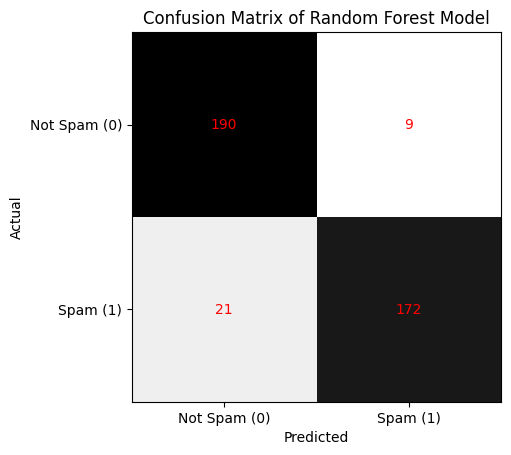

In [69]:
# Define Actual Labels and Predicted Values
yTrue = np.array(yTest)
yPred_RF_CM = np.array(yPred_RF)

# Compute the confusion matrix
cm = confusion_matrix(yTrue, yPred_RF_CM)

# Put The Confusion Matrix into a DataFrame
labels = ["Not Spam (0)", "Spam (1)"]

# Confusion Matrix Plot
plt.imshow(cm, cmap="binary")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add The Counts to The Plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="red")

plt.title("Confusion Matrix of Random Forest Model")

# Show The Plot
plt.show()

# SVC

In [70]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(xTrain, yTrain)

SVC()

In [75]:
yPred_SVC = SVC.predict(xTest)
print('SVM Accuracy Measures:')
print('F1 Score:', f1_score(yTest, yPred_SVC))
print('AUC-ROC:', roc_auc_score(yTest, yPred_SVC))
print('Accuracy:', accuracy_score(yTest, yPred_SVC))
print('Precision:', precision_score(yTest, yPred_SVC))
print('Recall:', recall_score(yTest, yPred_SVC))

SVM Accuracy Measures:
F1 Score: 0.9247311827956989
AUC-ROC: 0.9280079152237873
Accuracy: 0.9285714285714286
Precision: 0.9608938547486033
Recall: 0.8911917098445595


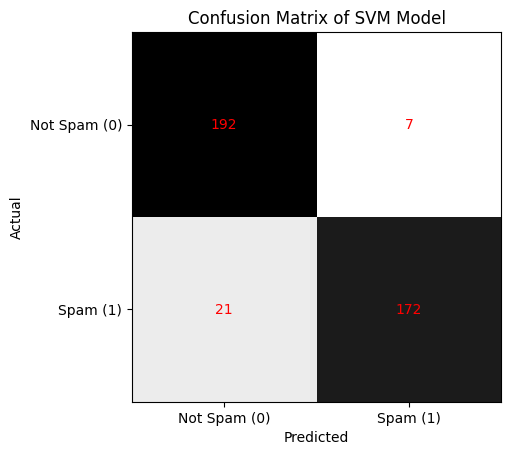

In [74]:
# Define Actual Labels and Predicted Values
yTrue = np.array(yTest)
yPred_SVC_CM = np.array(yPred_SVC)

# Compute the confusion matrix
cm = confusion_matrix(yTrue, yPred_SVC_CM)

# Put The Confusion Matrix into a DataFrame
labels = ["Not Spam (0)", "Spam (1)"]

# Confusion Matrix Plot
plt.imshow(cm, cmap="binary")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add The Counts to The Plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center", color="red")

plt.title("Confusion Matrix of SVM Model")

# Show The Plot
plt.show()